In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from yellowbrick.classifier import ClassificationReport

In [3]:
data=pd.read_csv('test_task.csv')

In [4]:
data.shape

(4157, 22)

In [5]:
data.sample(5)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
3482,761681,2016-10-25,2016-10-15,NaN,NaN,NaN,NaN,0.0,region_3,6,...,1,0,0,0,NaN,590.376406,NaN,26.0,False,1
1716,750072,2016-10-21,2016-04-18,NaN,NaN,NaN,NaN,2.0,region_3,6,...,6,0,0,0,6.0,625.619413,NaN,38.0,False,0
2767,631483,2016-08-29,2015-08-27,1.0,1.0,0.0,2016-01-01,1.0,region_1,26,...,6,0,0,0,6.0,588.634667,NaN,33.0,False,0
1228,293454,2015-12-22,2015-09-14,NaN,NaN,NaN,NaN,1.0,region_7,12,...,0,3,0,0,3.0,620.872030,NaN,30.0,False,0
3031,544836,2016-06-19,2015-02-11,1.0,0.0,0.0,2016-06-13,4.0,region_6,6,...,13,0,0,0,16.0,568.347246,NaN,52.0,True,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4157 entries, 0 to 4156
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loanKey              4157 non-null   int64  
 1   rep_loan_date        4157 non-null   object 
 2   first_loan           4157 non-null   object 
 3   dpd_5_cnt            675 non-null    float64
 4   dpd_15_cnt           675 non-null    float64
 5   dpd_30_cnt           675 non-null    float64
 6   first_overdue_date   675 non-null    object 
 7   close_loans_cnt      4142 non-null   float64
 8   federal_district_nm  4146 non-null   object 
 9   TraderKey            4157 non-null   int64  
 10  payment_type_0       4157 non-null   int64  
 11  payment_type_1       4157 non-null   int64  
 12  payment_type_2       4157 non-null   int64  
 13  payment_type_3       4157 non-null   int64  
 14  payment_type_4       4157 non-null   int64  
 15  payment_type_5       4157 non-null   i

In [7]:
data[['rep_loan_date','first_loan','first_overdue_date']]=data[['rep_loan_date','first_loan','first_overdue_date']].apply(pd.to_datetime)

In [8]:
X=data.drop(['bad_flag','loanKey'],axis=1)

In [9]:
X.shape

(4157, 20)

In [10]:
print(X.columns)

Index(['rep_loan_date', 'first_loan', 'dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt',
       'first_overdue_date', 'close_loans_cnt', 'federal_district_nm',
       'TraderKey', 'payment_type_0', 'payment_type_1', 'payment_type_2',
       'payment_type_3', 'payment_type_4', 'payment_type_5',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'gender'],
      dtype='object')


In [11]:
y=data['bad_flag']

In [12]:
X_cat=X[X.select_dtypes(include=['O','bool']).columns]

In [13]:
X_num=X[X.select_dtypes(exclude=['O','datetime64','bool']).columns]

In [14]:
X_date=X[X.select_dtypes(include=['datetime64']).columns]

In [15]:
print(X_cat.columns)

Index(['federal_district_nm', 'gender'], dtype='object')


In [16]:
print(X_num.columns)

Index(['dpd_5_cnt', 'dpd_15_cnt', 'dpd_30_cnt', 'close_loans_cnt', 'TraderKey',
       'payment_type_0', 'payment_type_1', 'payment_type_2', 'payment_type_3',
       'payment_type_4', 'payment_type_5', 'past_billings_cnt', 'score_1',
       'score_2', 'age'],
      dtype='object')


In [17]:
print(X_date.columns)

Index(['rep_loan_date', 'first_loan', 'first_overdue_date'], dtype='object')


In [18]:
X_cat.describe()

,federal_district_nm,gender
count,4146,4157
unique,8,2
top,region_3,False
freq,1595,3570


In [19]:
X_num.describe()

,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age
count,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000
mean,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222
std,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000
25%,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000
50%,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000
75%,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000
max,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000


In [20]:
X_date.describe()

,rep_loan_date,first_loan,first_overdue_date
count,4157,4157,675
unique,582,634,78
top,2016-10-15 00:00:00,2015-11-13 00:00:00,2016-01-15 00:00:00
freq,31,22,63
first,2015-02-24 00:00:00,2015-02-10 00:00:00,2015-05-01 00:00:00
last,2017-01-09 00:00:00,2016-12-12 00:00:00,2016-12-02 00:00:00


In [21]:
data['days_between_rep_and_first_loan']=(data['rep_loan_date']-data['first_loan']).dt.days

In [22]:
data['days_between_rep_and_first_loan'].sample(5)

1563     29
1098    458
3085    310
3543    290
3851    287
Name: days_between_rep_and_first_loan, dtype: int64

In [23]:
data['days_between_first_overdue_and_first_loan']=(data['first_overdue_date']-data['first_loan']).dt.days

In [24]:
data['days_between_first_overdue_and_first_loan'].sample(5)

1161      NaN
1562      NaN
1768    315.0
1792      NaN
644     122.0
Name: days_between_first_overdue_and_first_loan, dtype: float64

In [25]:
data=data.drop(['days_between_first_overdue_and_first_loan'],axis=1)

In [26]:
data.head(2)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,...,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_rep_and_first_loan
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaT,3.0,region_6,6,...,0,0,0,10.0,NaN,NaN,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,...,0,0,0,5.0,NaN,NaN,20.0,False,0,180


In [27]:
data['gender']=data['gender'].map({True:1,False:0})

In [28]:
fed_district = pd.get_dummies(data["federal_district_nm"], prefix="federal")

In [29]:
fed_district.head(2)

,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0


In [30]:
data=data.drop(["federal_district_nm"],axis=1)

In [31]:
data=pd.concat(objs=[data,fed_district],axis=1)

In [32]:
data.head(2)

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,TraderKey,payment_type_0,...,bad_flag,days_between_rep_and_first_loan,federal_region_0,federal_region_1,federal_region_2,federal_region_3,federal_region_4,federal_region_5,federal_region_6,federal_region_7
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaT,3.0,6,0,...,0,328,0,0,0,0,0,0,1,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,6,0,...,0,180,0,0,0,0,0,0,1,0


In [33]:
data.shape

(4157, 30)

In [34]:
data.fillna(value=0, inplace=True)

In [35]:
X=data.drop(['bad_flag','loanKey','rep_loan_date','first_overdue_date','first_loan'],axis=1)

In [36]:
y=data['bad_flag']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 3325
The number of records in the test dataset is 832
The training dataset has 2992 records for the majority class and 333 records for the minority class.


In [38]:
X_test.shape

(832, 25)

## Baseline Models for Classification 

In [39]:
RANDOM_SEED = 129

In [40]:
classifiers = [
 SGDClassifier(max_iter=1000, tol=1e-3, random_state=RANDOM_SEED),
 KNeighborsClassifier(),
 LogisticRegression(solver="lbfgs", random_state=RANDOM_SEED),
 LogisticRegressionCV(cv=3, random_state=RANDOM_SEED),
 BaggingClassifier(random_state=RANDOM_SEED),GaussianNB(),
 RandomForestClassifier(n_estimators=100, random_state=RANDOM_SEED)]


In [41]:
for classifier in classifiers:
    classifier.fit(X=X_train, y=y_train)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.16317016317016317
KNeighborsClassifier : 0.12173913043478259
LogisticRegression : 0.08247422680412371
LogisticRegressionCV : 0.061855670103092786
BaggingClassifier : 0.21311475409836067
GaussianNB : 0.26373626373626374
RandomForestClassifier : 0.1020408163265306


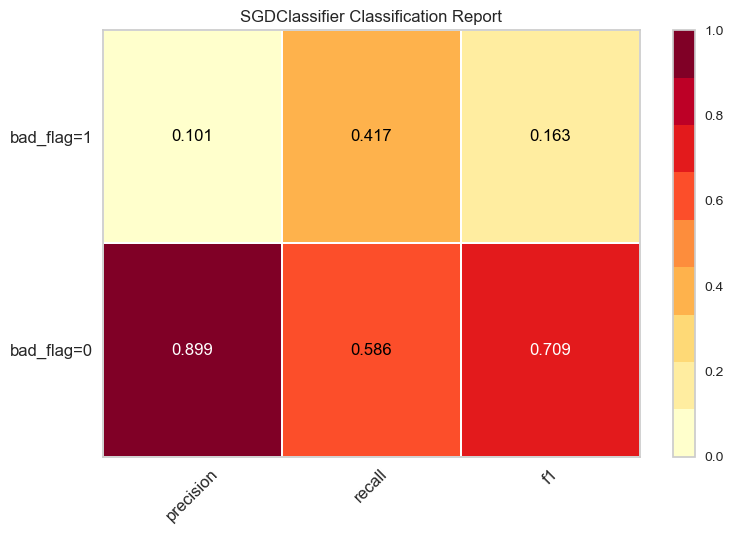

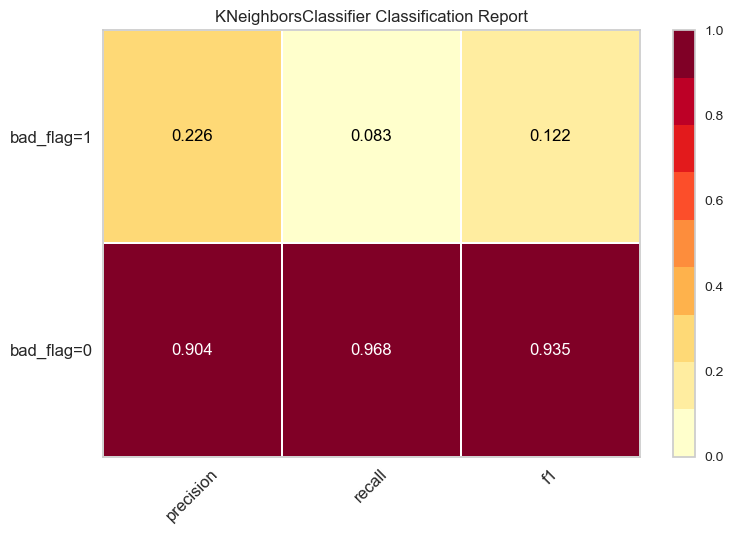

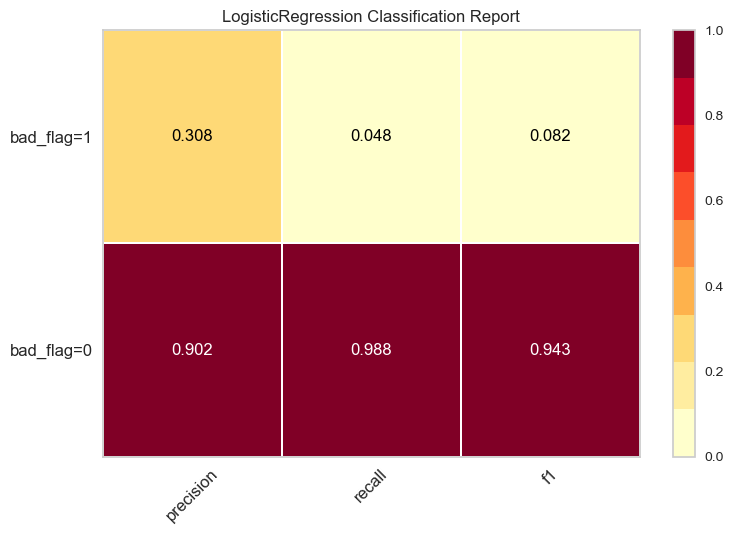

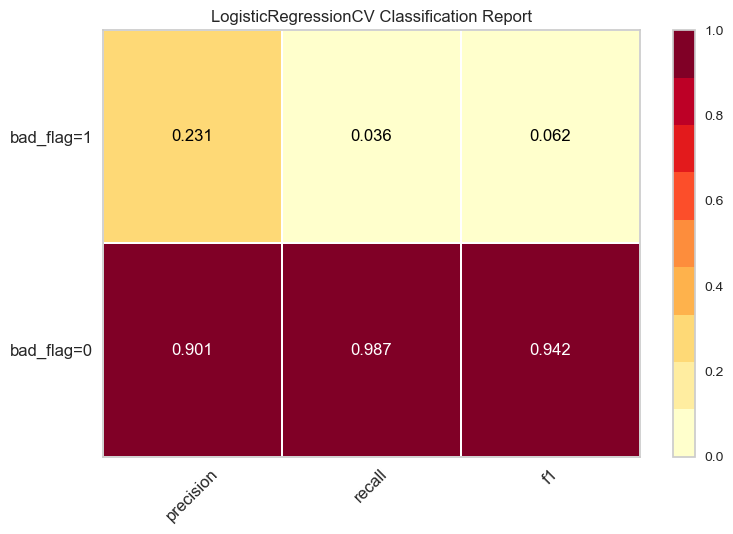

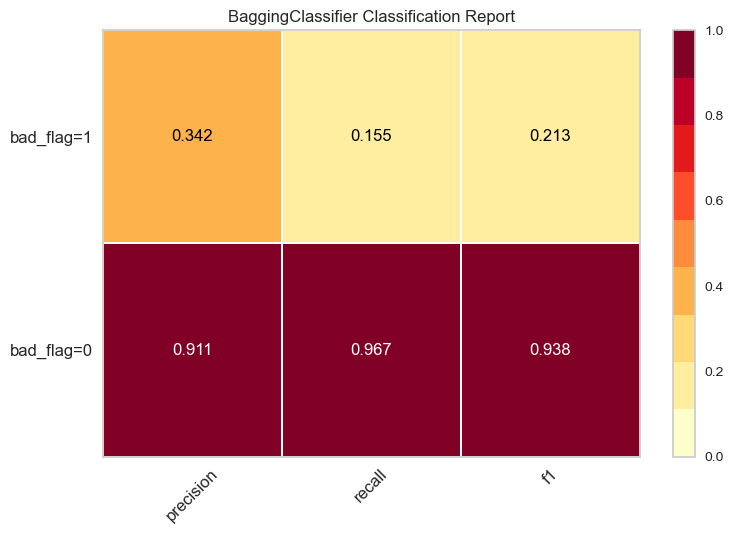

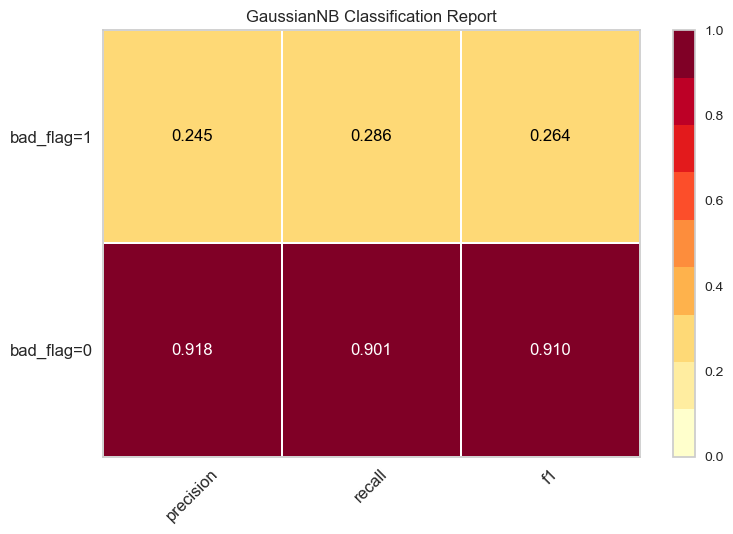

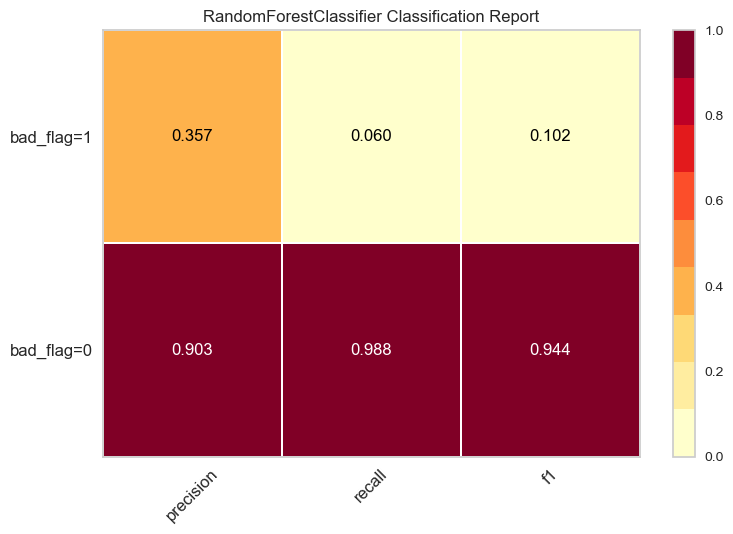

In [69]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train, y_train)
    visualizer.score(X_test, y_test)
    visualizer.show()


## Random Oversampling the Minority Class

In [71]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros= ros.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_ros).items()))

[(0, 2992), (1, 2992)]


In [73]:
for classifier in classifiers:
    classifier.fit(X=X_train_ros, y=y_train_ros)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.25503355704697983
KNeighborsClassifier : 0.18947368421052632
LogisticRegression : 0.32727272727272727
LogisticRegressionCV : 0.30945558739255014
BaggingClassifier : 0.19480519480519481
GaussianNB : 0.3041825095057034
RandomForestClassifier : 0.21874999999999997


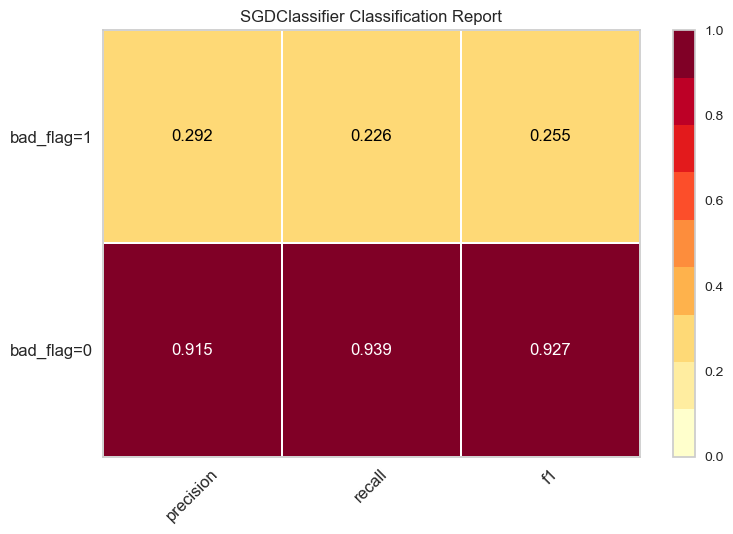

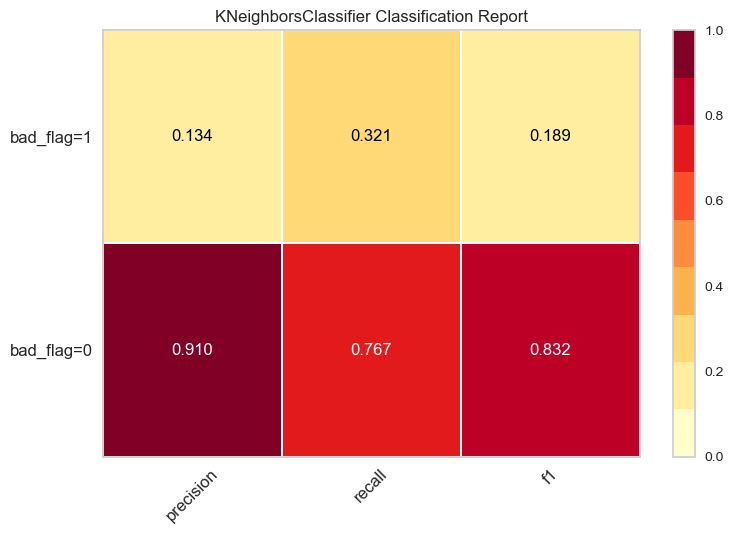

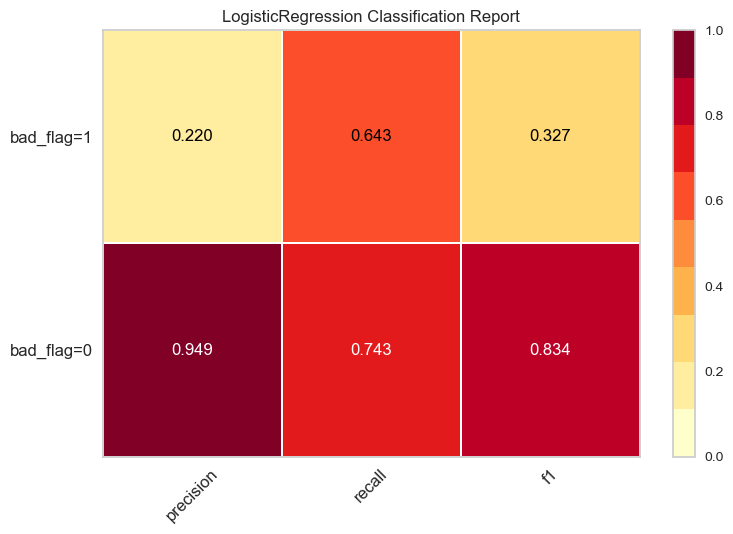

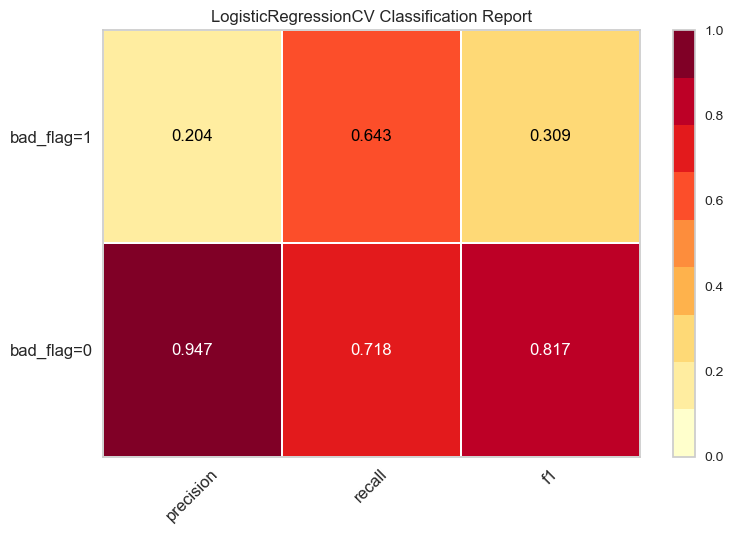

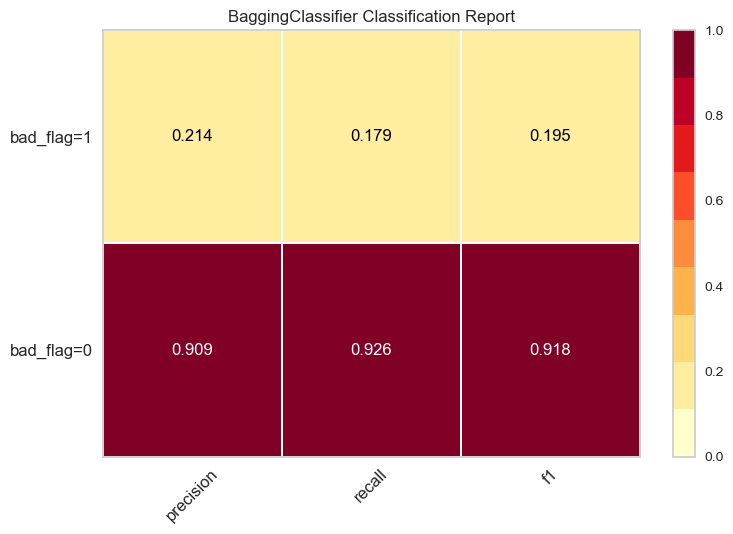

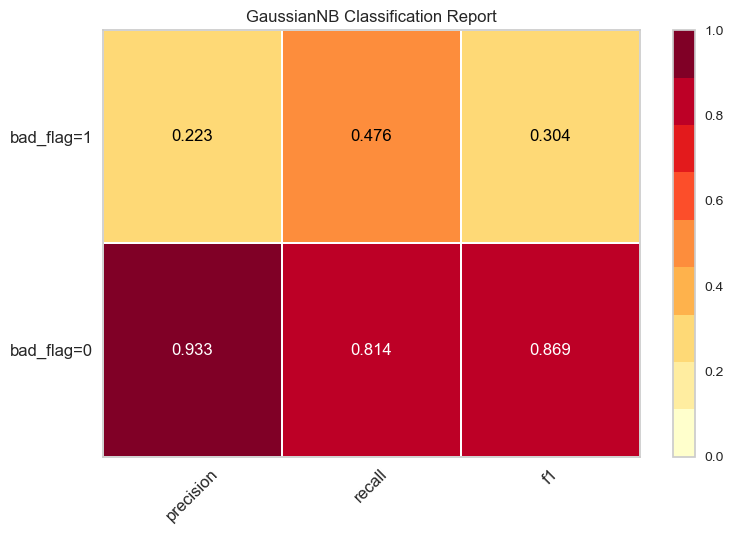

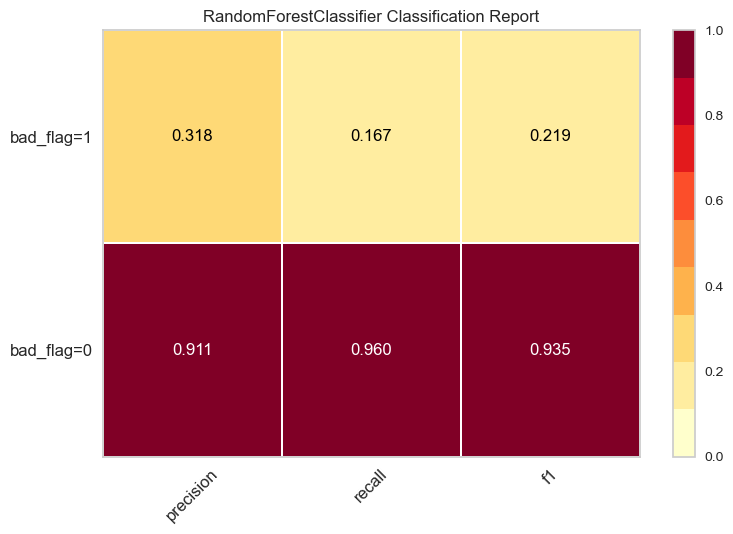

In [74]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train_ros, y_train_ros)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Random Undersampling the Majority Class

In [65]:
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_rus).items()))

[(0, 333), (1, 333)]


In [75]:
for classifier in classifiers:
    classifier.fit(X=X_train_rus, y=y_train_rus)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.2111111111111111
KNeighborsClassifier : 0.23978201634877383
LogisticRegression : 0.2888888888888889
LogisticRegressionCV : 0.2864721485411141
BaggingClassifier : 0.2865853658536585
GaussianNB : 0.29914529914529914
RandomForestClassifier : 0.3275862068965517


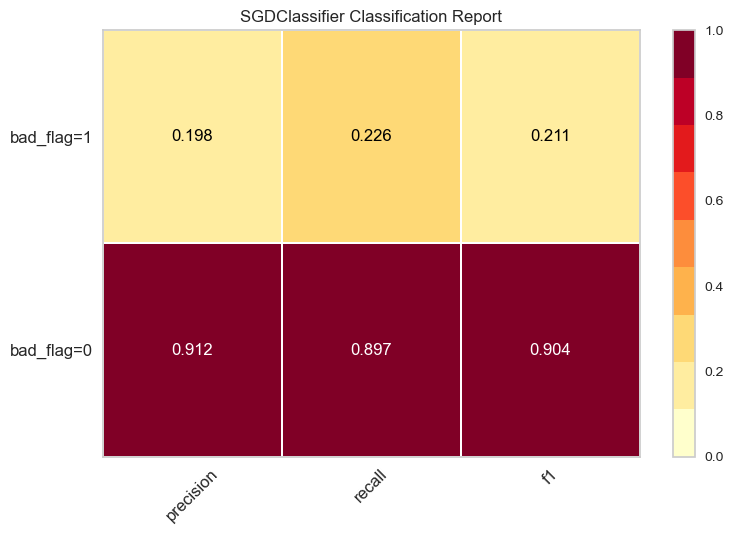

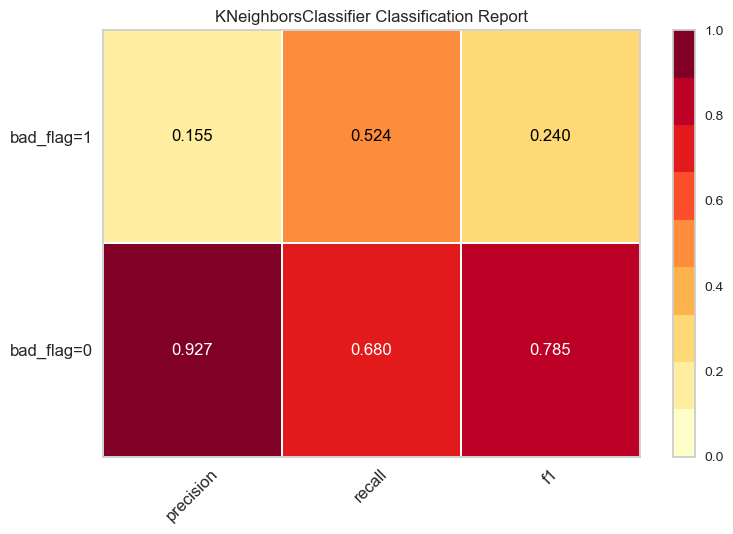

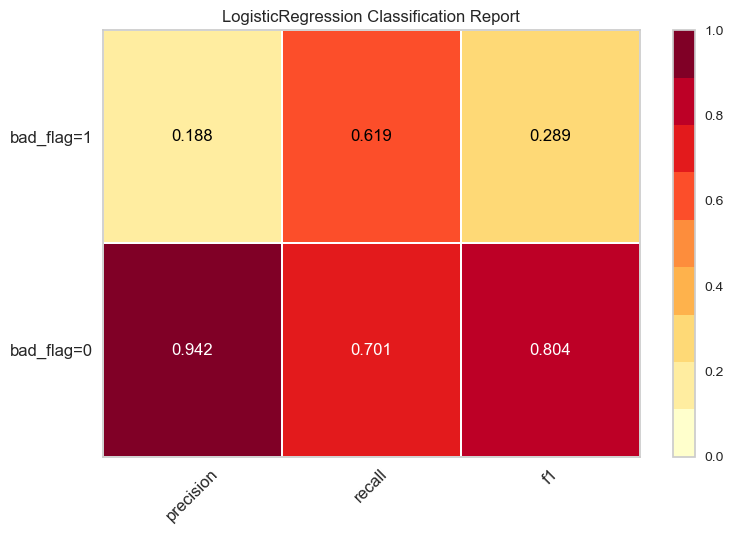

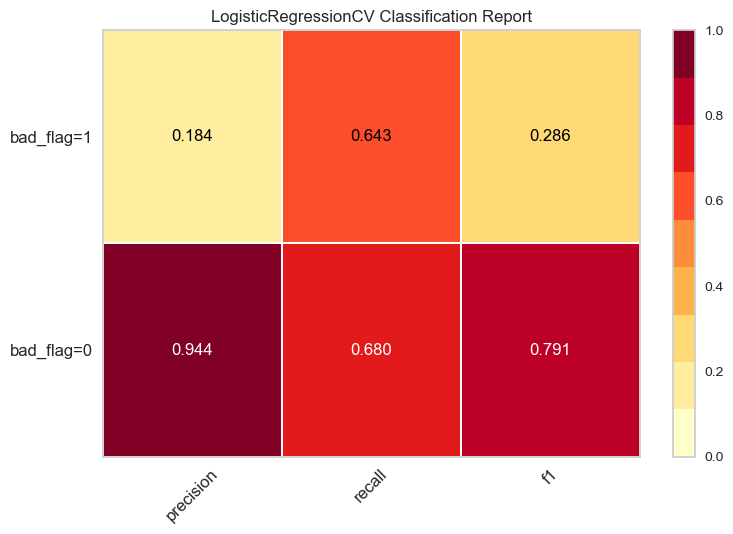

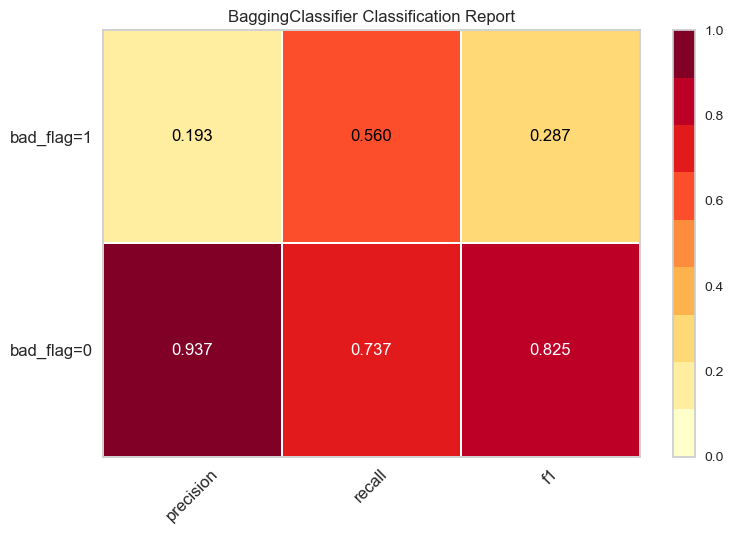

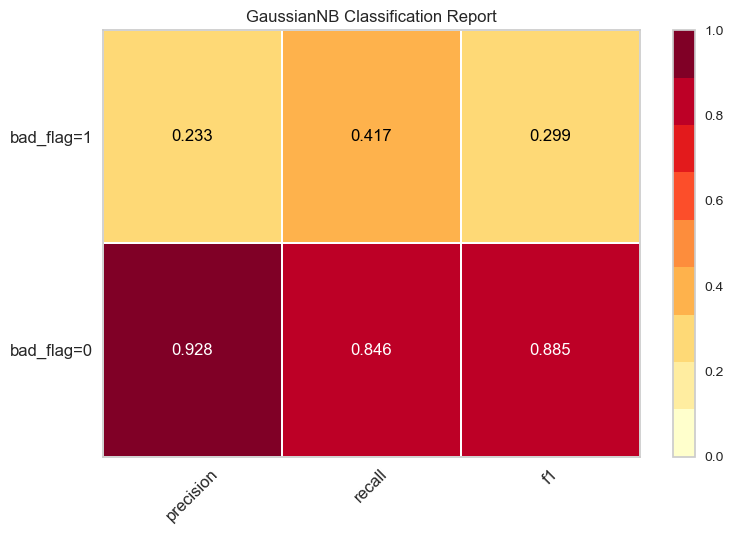

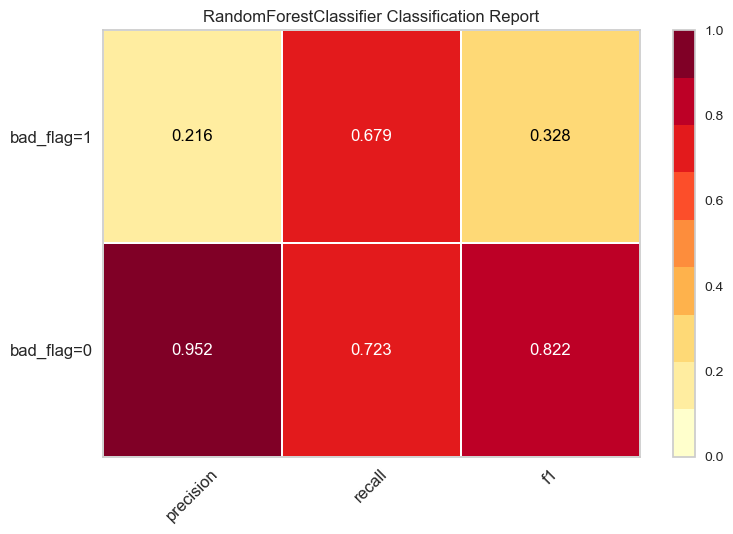

In [76]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train_rus, y_train_rus)
    visualizer.score(X_test, y_test)
    visualizer.show()

## SMOTE Oversampling the Minority Class

In [66]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote= smote.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_smote).items()))

[(0, 2992), (1, 2992)]


In [77]:
for classifier in classifiers:
    classifier.fit(X=X_train_smote, y=y_train_smote)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.2613065326633166
KNeighborsClassifier : 0.19526627218934914
LogisticRegression : 0.30303030303030304
LogisticRegressionCV : 0.2711864406779661
BaggingClassifier : 0.25333333333333335
GaussianNB : 0.21307506053268763
RandomForestClassifier : 0.1889763779527559


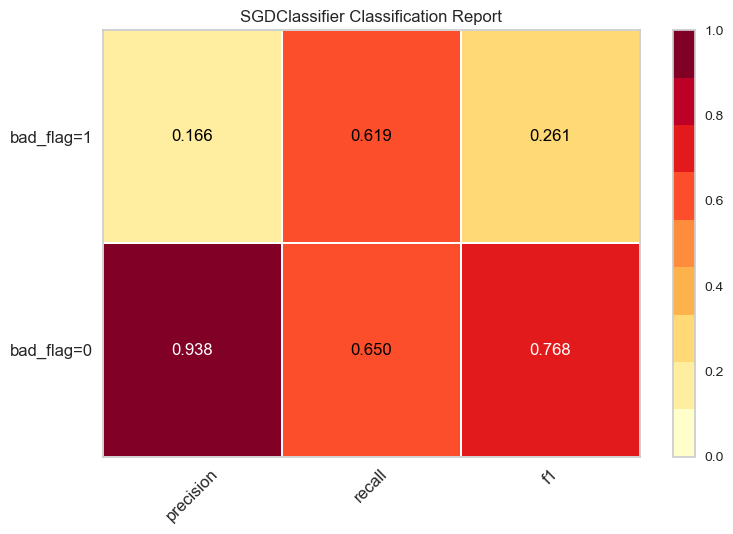

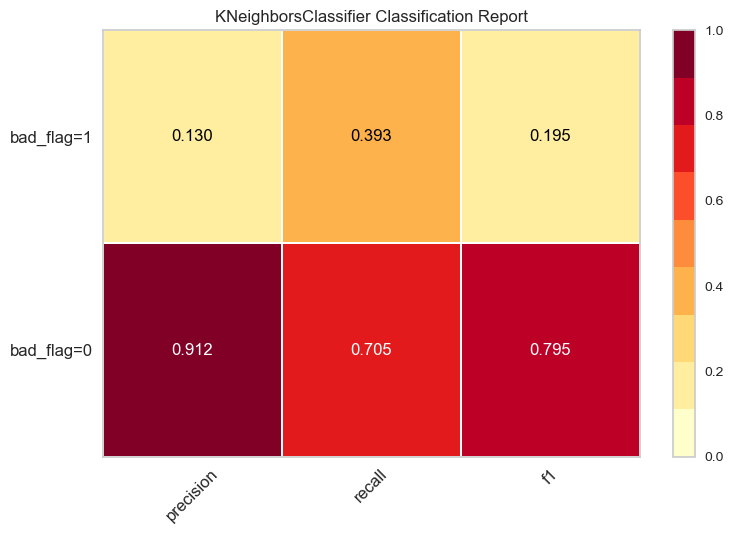

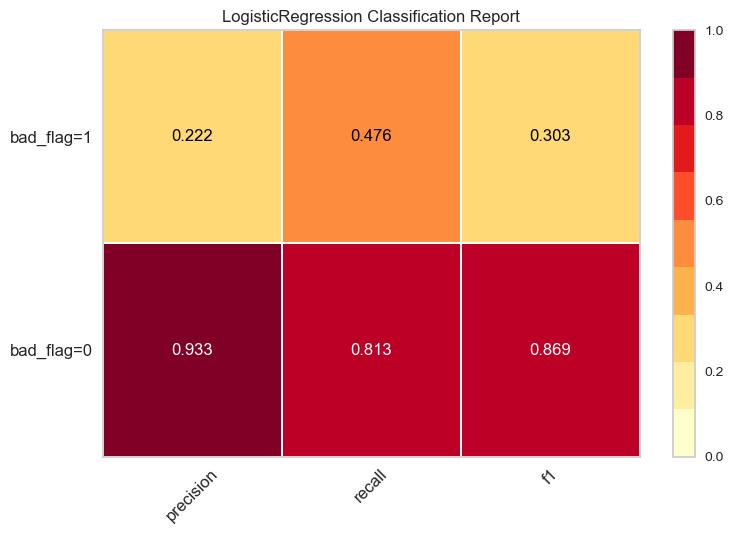

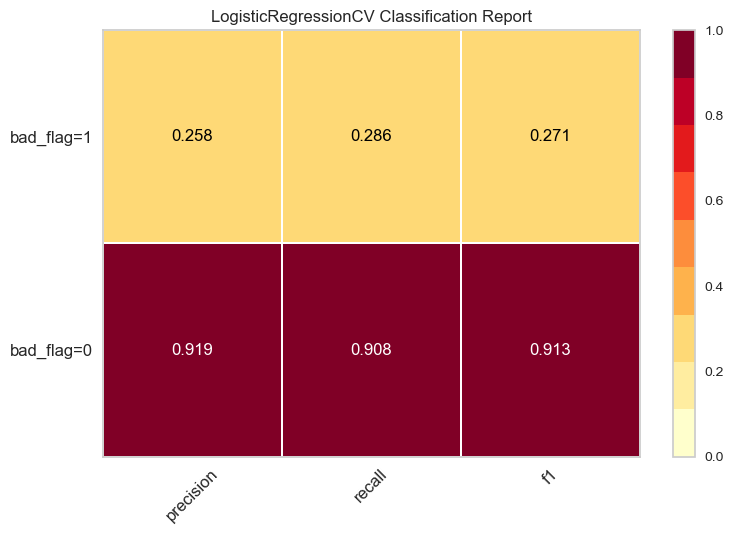

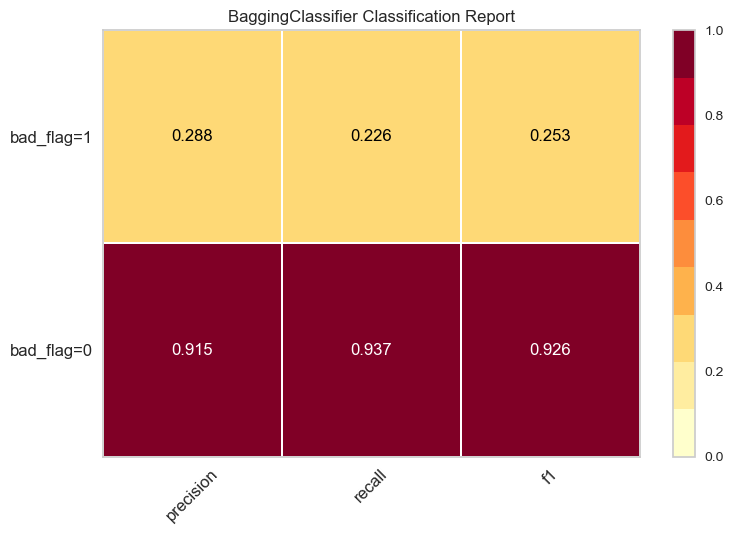

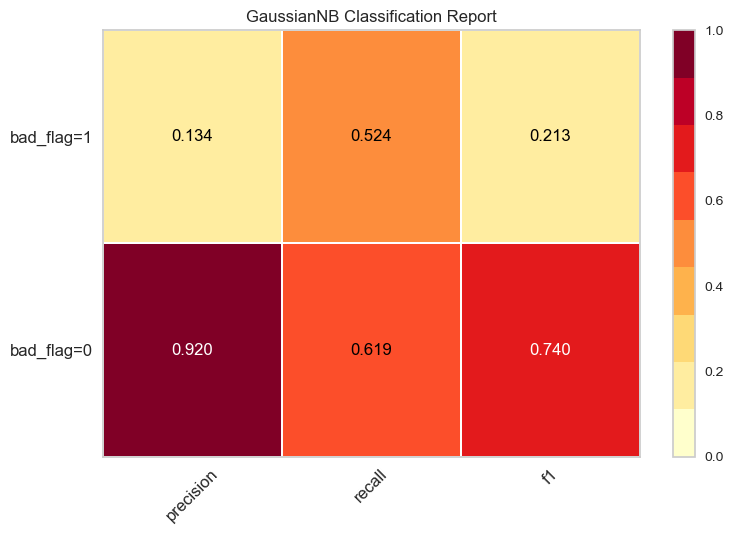

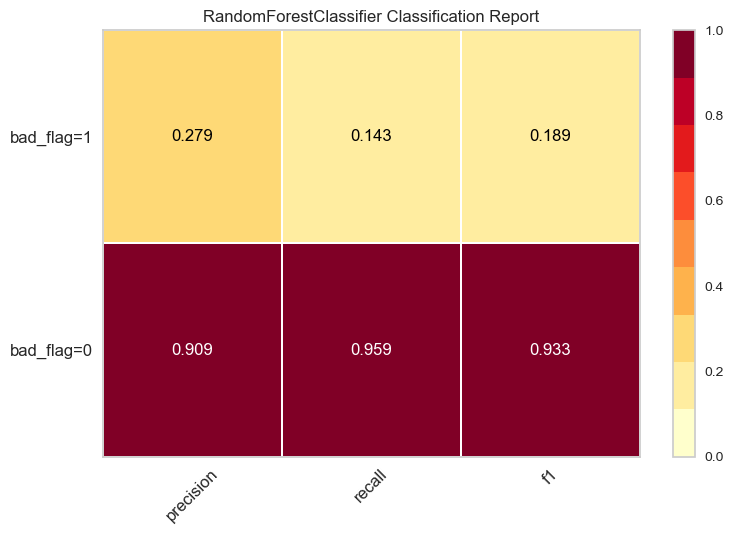

In [78]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train_smote, y_train_smote)
    visualizer.score(X_test, y_test)
    visualizer.show()

## Undersampling using NearMiss-Version-3 for Imbalanced Dataset

In [67]:
nearmiss = NearMiss(version=3)
X_train_nearmiss, y_train_nearmiss= nearmiss.fit_resample(X_train, y_train)
print(sorted(Counter(y_train_nearmiss).items()))

[(0, 333), (1, 333)]


In [79]:
for classifier in classifiers:
    classifier.fit(X=X_train_nearmiss, y=y_train_nearmiss)
    y_pred = classifier.predict(X=X_test)
    f1 = f1_score(y_true=y_test, y_pred=y_pred)
    print(classifier.__class__.__name__, ":", f1)

SGDClassifier : 0.2099447513812155
KNeighborsClassifier : 0.21164021164021166
LogisticRegression : 0.2864864864864865
LogisticRegressionCV : 0.2731707317073171
BaggingClassifier : 0.2492401215805471
GaussianNB : 0.18045112781954886
RandomForestClassifier : 0.3028571428571428


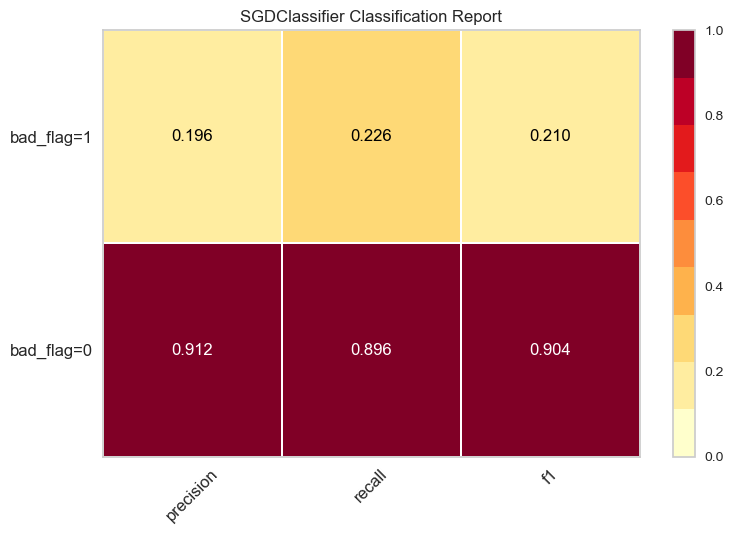

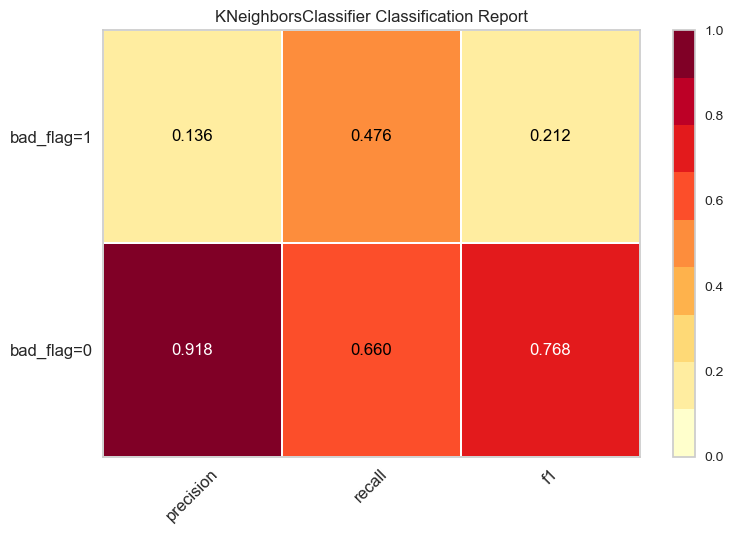

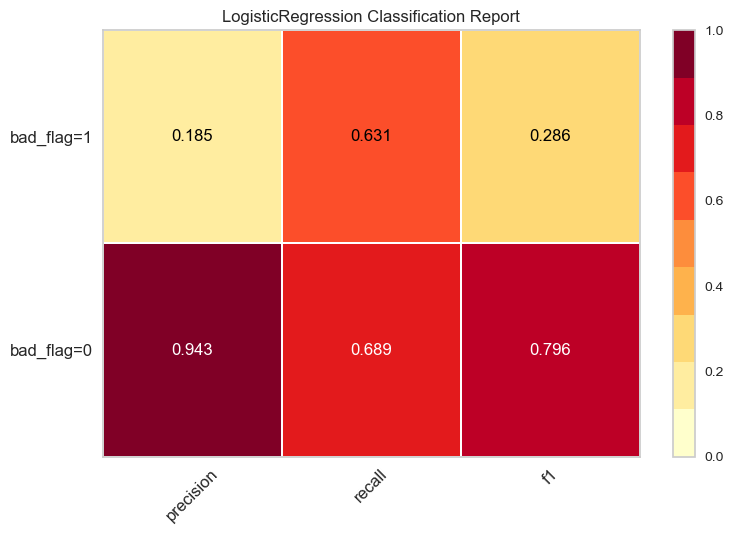

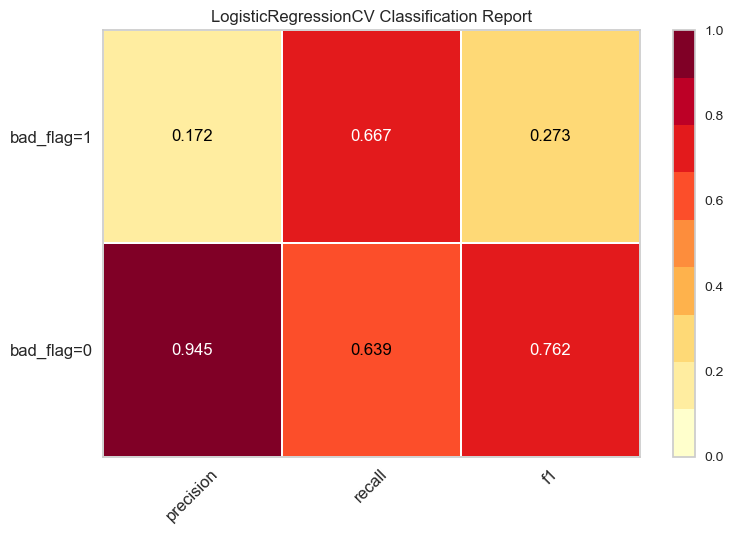

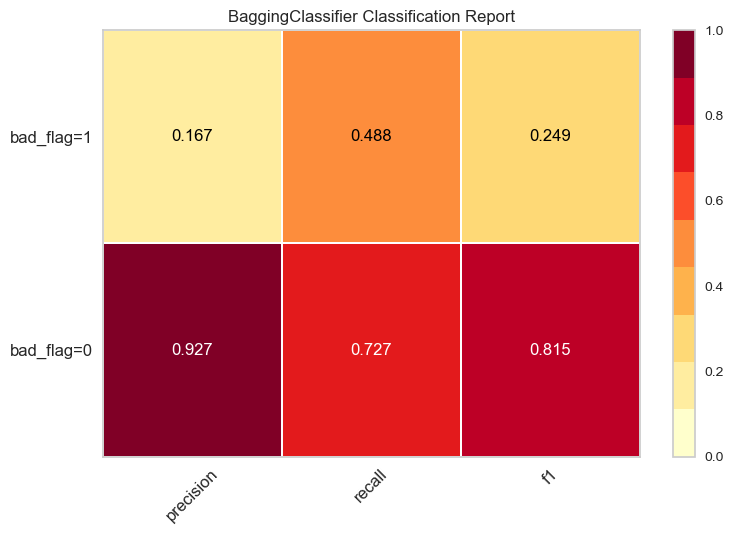

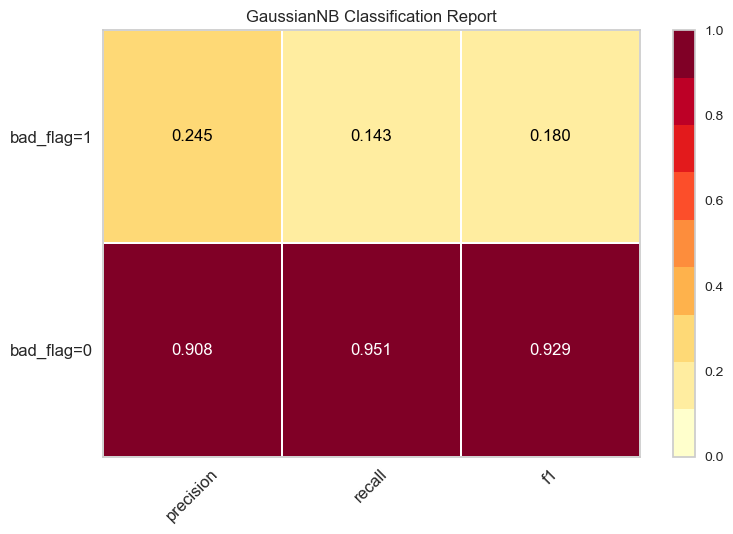

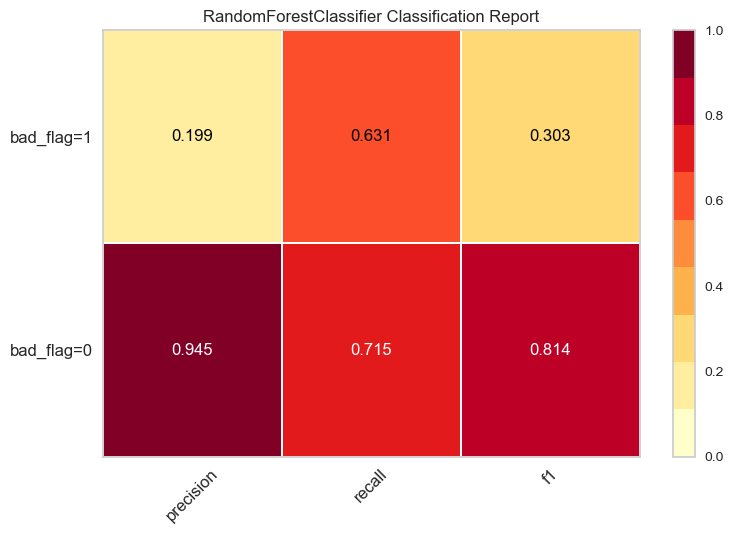

In [80]:
for classifier in classifiers:
    visualizer = ClassificationReport(classifier, classes=["bad_flag=0", "bad_flag=1"])
    visualizer.fit(X_train_nearmiss, y_train_nearmiss)
    visualizer.score(X_test, y_test)
    visualizer.show()